In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# imports 
from data.lda_data import DataLoader
from lda.lda_model import LDAModel

In [3]:
loader = DataLoader()

In [4]:
print("Number of loaded documents: ", len(loader.data))

Number of loaded documents:  11314


Let's take a look at a random document:

In [5]:
print("Example document:")
print(loader.data[0])

Example document:
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







Preprocessing:

In [6]:
loader.preprocess()

Loading existing preprocessed documents...


Let's take a look at the same document, but now after lemmatization and stemming:

In [7]:
print(loader.processed_docs[0])

['lerxst', 'thing', 'subject', 'nntp', 'post', 'host', 'organ', 'univers', 'maryland', 'colleg', 'park', 'line', 'wonder', 'enlighten', 'door', 'sport', 'look', 'late', 'earli', 'call', 'bricklin', 'door', 'small', 'addit', 'bumper', 'separ', 'rest', 'bodi', 'know', 'tellm', 'model', 'engin', 'spec', 'year', 'product', 'histori', 'info', 'funki', 'look', 'mail', 'thank', 'bring', 'neighborhood', 'lerxst']


We will now build the dictionary

In [8]:
dictionary = loader.build_dictionary()

The size of the dictionary:

In [9]:
len(dictionary)

6591

Let's take a look at the dictionary:

In [10]:
dictionary[6590]

'hollywood'

In [11]:
docs, maxdoclen = loader.filter_docs(dictionary)

In [12]:
print("Example document - filtered:")
print(docs[0])

print("Maximum document length:", maxdoclen)

Example document - filtered:
[29, 20, 11, 30, 17, 5, 21, 31, 9, 6, 27, 15, 14, 7, 4, 6, 25, 0, 3, 24, 23, 1, 13, 18, 8, 26, 32, 22, 10, 12, 15, 16, 28, 2, 19]
Maximum document length: 4621


In [13]:
[dictionary[w] for w in docs[12]]

['nntp',
 'host',
 'hewlett',
 'packard',
 'fort',
 'collin',
 'newsread',
 'version',
 'regard',
 'email',
 'hewlett',
 'packard',
 'east',
 'harmoni',
 'fort',
 'collin']

In [14]:
def plot_topics_distributions(iterations, doc_idx, model):
    iterations_data = [model.iteration_data[iteration - 1] for iteration in iterations]
    
    c_d_in_iterations = [it[2] for it in iterations_data]
    
    topics_distributions = [c_d[doc_idx, :] for c_d in c_d_in_iterations]
    
    count = 1
    fig = plt.figure(figsize=(14,8))
    for i in range(0, 2):
        d = len(iterations)
        half = int(d / 2)
        for j in range(half):
            topics_dist = topics_distributions[count - 1]
            iteration = iterations[count - 1]

            subplot_code = int("2{}{}".format(half, count))
            ax = fig.add_subplot(subplot_code)

            ax.bar(range(model.topics_count), topics_dist)

            ax.set_title("Topic distribution - Doc: {}, Iteration: {}".format(doc_idx, iteration))
            ax.set_ylabel("Word count per topic")
            ax.set_xlabel("Topics")

            count += 1

    plt.show()

In [15]:
topics_num = 20
iterations = 50
alpha = 0.1
gamma = 0.1

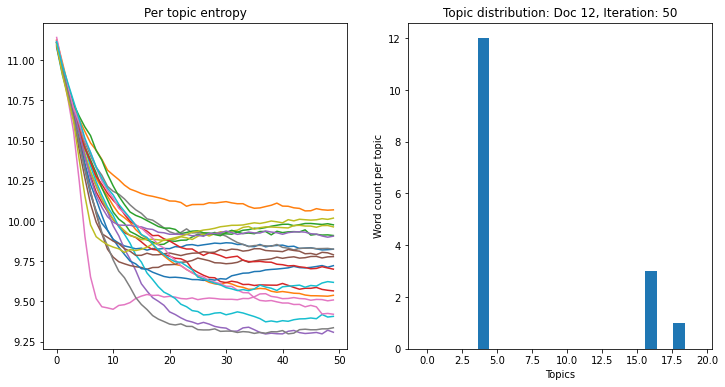

Iteration: 50/50, time: 61.02081060409546 seconds


In [16]:
model = LDAModel(seed=4567)
model.fit(docs, dictionary, topics_num, iterations, alpha, gamma, max_doc_len=maxdoclen)

# Task 2.

**Plot the distribution over topics for one chosen document after initialization and after 1st, 2nd, 5th, 10th, 20th, and 50th iteration. Comment on
these.**

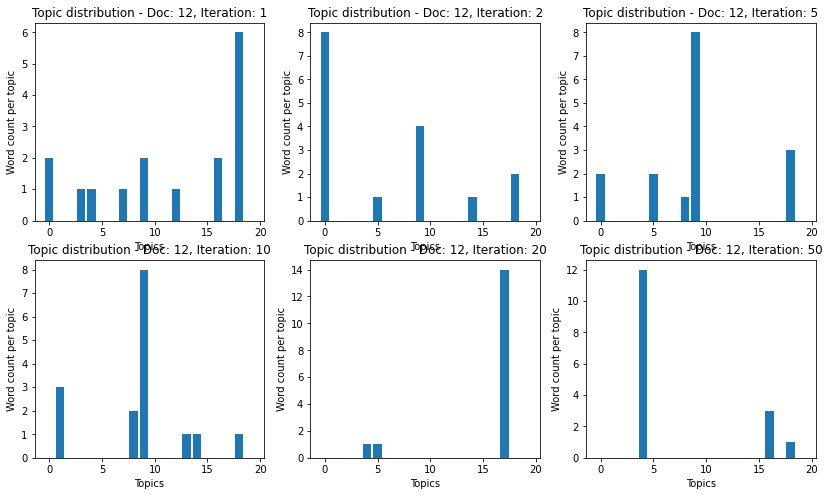

In [17]:
plot_topics_distributions([1, 2, 5, 10, 20, 50], 12, model)

# Task 3. 

**Compute the word entropy for each of the topics as a function of the
number of Gibbs iterations**

See above - entropies are plotted in each iteration of the `fit` method

## Task 4.

**Show histograms of the most frequent 20 words of three chosen topics after
50 Gibbs iterations.**

In [18]:
def plot_top_words(iteration_data, dictionary, topics, top_words=20):
        last_iteration = iteration_data[-1]
        c_w = last_iteration[1]

        for topic in topics:
            plt.figure(figsize=(6,3))
            plt.xticks(rotation=90)
            words_in_topic = c_w[:, topic] # Counts of words in topic k
            word_tokenIDs = np.argsort(words_in_topic)[-top_words:]

            words_to_plot=[dictionary[tokenID] for tokenID in word_tokenIDs]
            freqs = np.sort(words_in_topic)[-top_words:]
            plt.bar(words_to_plot, freqs)
            print()

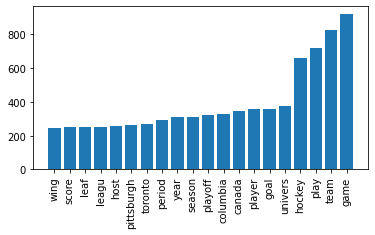

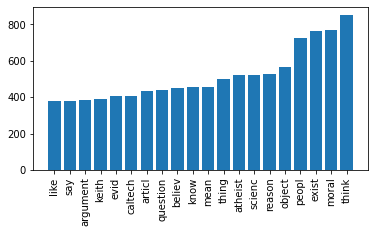

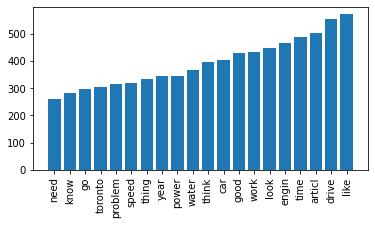

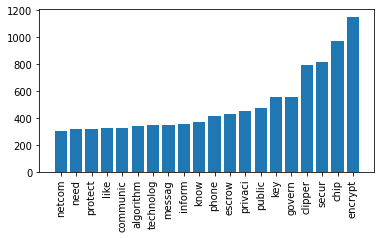

In [19]:
plot_top_words(model.iteration_data, dictionary, topics=[1, 3, 8, 10])

## Task 5. 
**Preprocess the test data in the same way as the training data. For filtration, use the dictionary from the training data. Compute the per-word perplexity of the test data for the state after 50 Gibbs iterations. Compare it to a simple bayesian model not using any hidden variables and using only one distribution over words β for all documents with symmetric Dirichlet prior with and concentration parameter γ = 0.1.**

In [20]:
test_loader = DataLoader(split='test')
test_loader.load_data()
test_loader.preprocess()

Loading existing preprocessed documents...


In [21]:
print(test_loader.data[42])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: A Point for Helmet Law is a Point for
Organization: Sun Microsystems, RTP, NC
Lines: 20
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article i8n@agate.berkeley.edu, manish@uclink.berkeley.edu (Manish Vij) writes:
>
>>Motorcycles are not allowed on th 17 mile drive at pebble Beach.
>
>what?
>
>are there posted signs?
>
>what do they cite you for?

They don't.  It's a closed access road, you pay to get in (if you don't
have a resident sticker), and they simply don't open the gates if
you're on a bike.

---
Ed Green, former Ninjaite |I was drinking last night with a biker,
  Ed.Green@East.Sun.COM   |and I showed him a picture of you.  I said,
DoD #0111  (919)460-8302  |"Go on, get to know her, you'll like her!"
 (The Grateful Dead) -->  |It seemed like the least I could do...




In [22]:
test_docs, test_maxdoclen = test_loader.filter_docs(dictionary)

In [23]:
print("Example test document - filtered:")
print(test_docs[42])

print("Maximum test document length:", test_maxdoclen)

Example test document - filtered:
[3127, 577, 165, 2065, 3659, 177, 2740, 177, 2922, 93, 188, 334, 3127, 577, 20, 11, 3192, 577, 36, 4473, 1625, 4293, 1625, 2792, 233, 935, 359, 4177, 303, 3711, 866, 78, 1375, 961, 3140, 562, 1592, 3235, 451, 165, 4261, 1867, 3123, 165, 577, 389, 2724, 299, 13, 115, 3953, 2292, 115]
Maximum test document length: 3954


In [24]:
[dictionary[w] for w in test_docs[42]]

['egreen',
 'east',
 'green',
 'pixel',
 'cruncher',
 'point',
 'helmet',
 'point',
 'microsystem',
 'distribut',
 'world',
 'repli',
 'egreen',
 'east',
 'nntp',
 'host',
 'laser',
 'east',
 'articl',
 'agat',
 'berkeley',
 'uclink',
 'berkeley',
 'motorcycl',
 'allow',
 'mile',
 'drive',
 'beach',
 'sign',
 'cite',
 'close',
 'access',
 'road',
 'resid',
 'sticker',
 'simpli',
 'open',
 'gate',
 'bike',
 'green',
 'drink',
 'night',
 'biker',
 'green',
 'east',
 'show',
 'pictur',
 'say',
 'know',
 'like',
 'grate',
 'dead',
 'like']

In [25]:
np.random.seed(4321)

In [26]:
c_d_test = np.zeros((len(test_docs), model.topics_count), dtype=np.int)
z_nd_test = [np.random.randint(0, model.topics_count, size=len(d)) for d in test_docs]
N_test = 0
for d, document in enumerate(test_docs):
    for n, m in enumerate(document):
        k = z_nd_test[d][n]
        c_d_test[d, k] += 1
        N_test += 1
        
        #z_nd_value = z_nd_test[d][n]
        #w_nd = m

        #c_d_test[d][z_nd_value] = max(0, c_d_test[d][z_nd_value] - 1)

        #left_side = (alpha + c_d_test[d,:]) / (model.topics_count * alpha + len(document) - 1)
        #right_side = (gamma + model.c_w[w_nd, :]) / (model.words_count * gamma + model.c[:])
        #p = np.multiply(left_side, right_side)
        #p /= sum(p)

        #k = np.random.choice(range(model.topics_count), p=p)

        #z_nd_test[d][n] = k
        #c_d_test[d, k] += 1

In [27]:
import math
from IPython import display

def get_entropy_test_data(model, c_d_test):
    gamma = 0.1
    alpha = 0.1
    M = len(dictionary)
    K = model.topics_count
    
    entropy = 0
    sums_per_topic = np.zeros((model.topics_count, ), dtype=np.int)
    for k in range(model.topics_count):
        sums_per_topic[k] = np.sum(model.c_w[:, k])
        
    for d, document in enumerate(test_docs):
        display.clear_output(wait=True)
        print("Doc {}/{}".format(d + 1, len(test_docs)))
        
        for n in range(len(document)):
            w_nd = document[n]
            sum_per_topic = sums_per_topic[k]
            
            left = (gamma + model.c_w[w_nd, :]) / (M * gamma + sums_per_topic)
            right = (alpha + c_d_test[d, :]) / (K * alpha + len(document))
            
            p = left * right
            entropy += np.log2(np.sum(p))
    entropy = -(entropy) / N_test
    return entropy

In [28]:
entropy_test = get_entropy_test_data(model, c_d_test)

Doc 7532/7532


In [29]:
entropy_test

11.408800001149764

In [30]:
perplexity_test = 2 ** entropy_test

In [31]:
perplexity_test

2718.8861027599387

In [32]:
# count on training, entropy on test data
def simple_model_entropy(gamma):
    freqs = {}
    for d, document in enumerate(docs):
        for n, m in enumerate(document):
            if m in freqs:
                freqs[m] += 1
            else:
                freqs[m] = 1
    total = sum(freqs.values())
    
    entropy = 0
    N_test = 0
    for d, document in enumerate(test_docs):
        for n, m in enumerate(document):
            p = (gamma + freqs[m]) / (len(dictionary) * gamma + total)
            entropy += np.log2(p)
            N_test += 1
    entropy = -(entropy) / N_test
    return entropy

In [33]:
simple_model_entropy = simple_model_entropy(gamma)

In [34]:
simple_model_entropy

11.359219611647433

In [35]:
simple_model_perplexity = 2 ** simple_model_entropy

In [36]:
simple_model_perplexity

2627.0348276547684

# Task 6. 

**Try to change the number of topics K, the hyperparameters α and γ and
the number of Gibbs iterations. How the performance changes?**

### Run 1

- Number of topics: 15
- Iterations: 40
- $\alpha$: 0.2
- $\gamma$: 0.05

In [37]:
topics_num = 15
iterations = 40
alpha = 0.2
gamma = 0.05

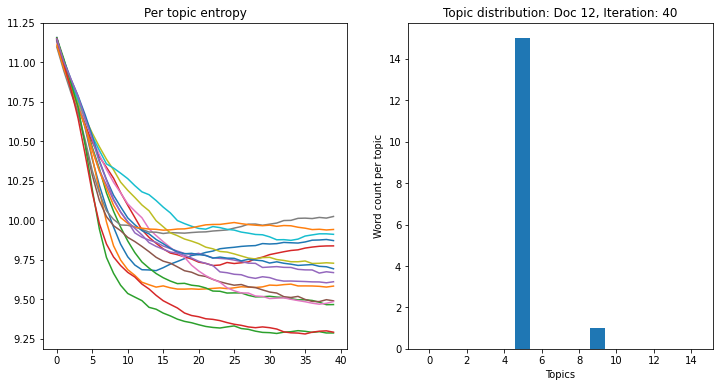

Iteration: 40/40, time: 52.70004987716675 seconds


In [38]:
model = LDAModel(seed=4567)
model.fit(docs, dictionary, topics_num, iterations, alpha, gamma, max_doc_len=maxdoclen)

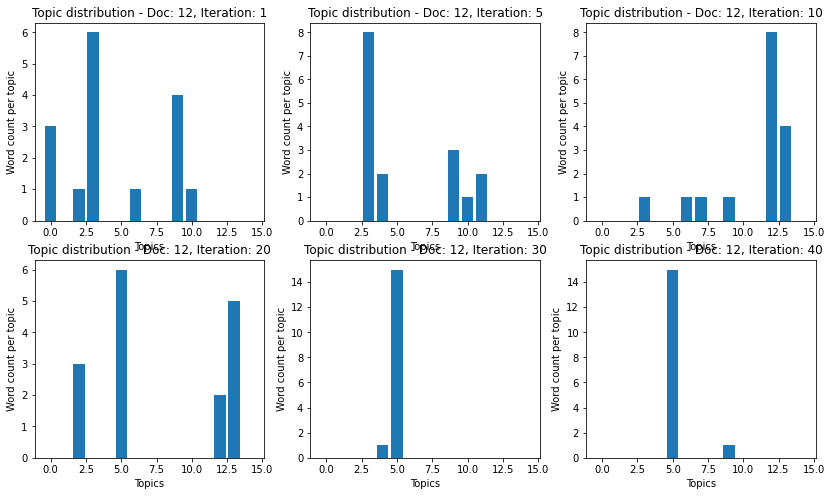

In [39]:
plot_topics_distributions([1, 5, 10, 20, 30, 40], 12, model)

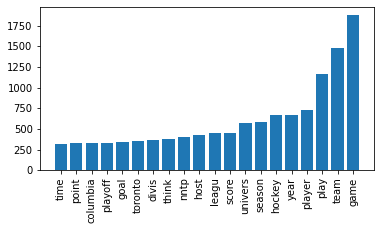

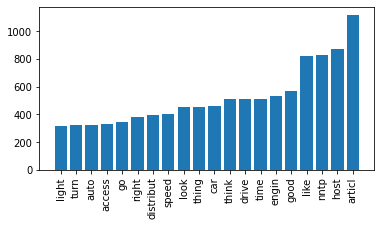

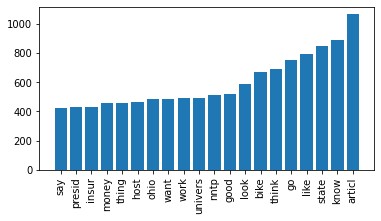

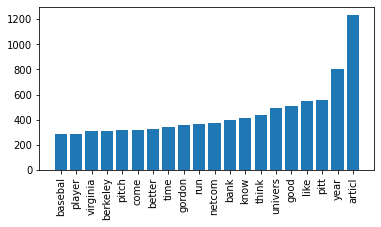

In [40]:
plot_top_words(model.iteration_data, dictionary, topics=[1, 3, 8, 10])

Entropy and perplexity calculation after training the model:

In [41]:
c_d_test = np.zeros((len(test_docs), model.topics_count), dtype=np.int)
z_nd_test = [np.random.randint(0, model.topics_count, size=len(d)) for d in test_docs]
N_test = 0
for d, document in enumerate(test_docs):
    for n, m in enumerate(document):
        k = z_nd_test[d][n]
        c_d_test[d, k] += 1
        N_test += 1        

In [42]:
entropy_test = get_entropy_test_data(model, c_d_test)

Doc 7532/7532


In [43]:
entropy_test

11.398472492379193

In [44]:
perplexity_test = 2 ** entropy_test

In [45]:
perplexity_test

2699.492498435711

### Run 2

- Number of topics: 25
- Iterations: 35
- $\alpha$: 0.1
- $\gamma$: 0.1

In [46]:
topics_num = 25
iterations = 35
alpha = 0.1
gamma = 0.1

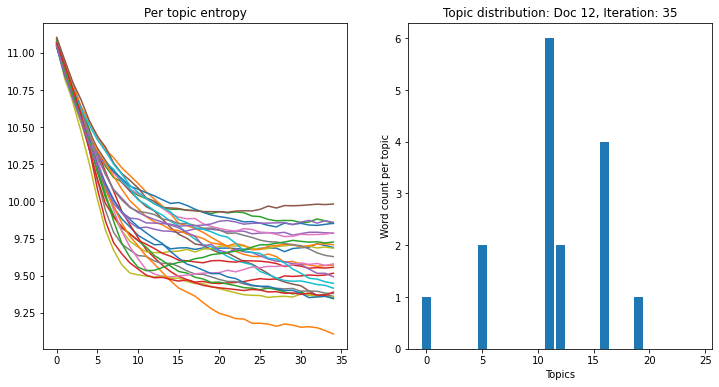

Iteration: 35/35, time: 56.73273491859436 seconds


In [47]:
model = LDAModel(seed=4567)
model.fit(docs, dictionary,topics_num, iterations, alpha, gamma, max_doc_len=maxdoclen)

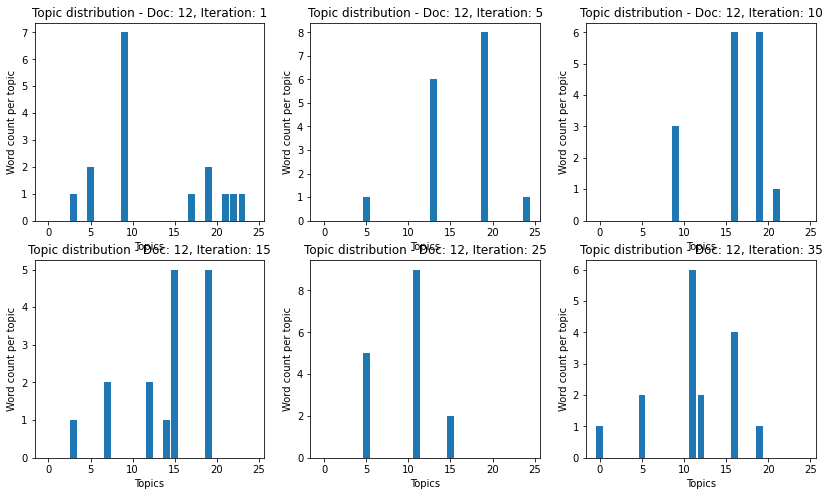

In [48]:
plot_topics_distributions([1, 5, 10, 15, 25, 35], 12, model)

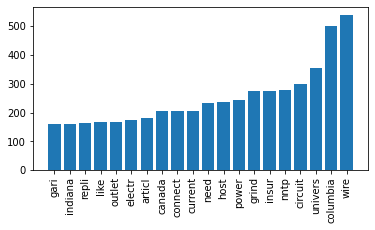

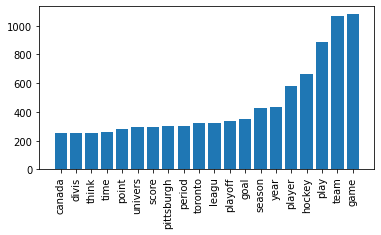

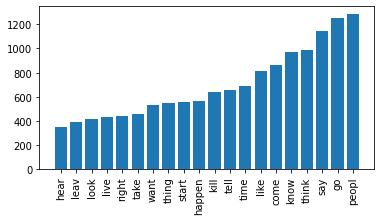

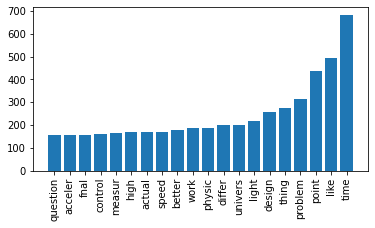

In [49]:
plot_top_words(model.iteration_data, dictionary, topics=[1, 3, 8, 10])

Entropy and perplexity calculation after training the model:

In [50]:
c_d_test = np.zeros((len(test_docs), model.topics_count), dtype=np.int)
z_nd_test = [np.random.randint(0, model.topics_count, size=len(d)) for d in test_docs]
N_test = 0
for d, document in enumerate(test_docs):
    for n, m in enumerate(document):
        k = z_nd_test[d][n]
        c_d_test[d, k] += 1
        N_test += 1  

In [51]:
entropy_test = get_entropy_test_data(model, c_d_test)

Doc 7532/7532


In [52]:
entropy_test

11.414715659449577

In [53]:
perplexity_test = 2 ** entropy_test

In [54]:
perplexity_test

2730.0575710160856

### Run 3

- Number of topics: 12
- Iterations: 45
- $\alpha$: 0.3
- $\gamma$: 0.3

In [55]:
topics_num = 12
iterations = 45
alpha = 0.3
gamma = 0.3

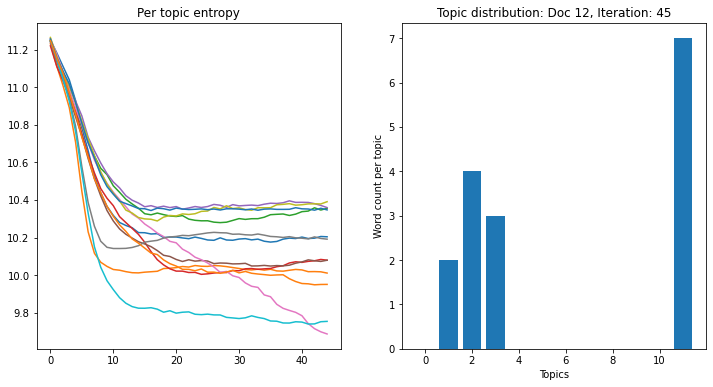

Iteration: 45/45, time: 53.35639190673828 seconds


In [56]:
model = LDAModel(seed=4567)
model.fit(docs, dictionary,  topics_num, iterations, alpha, gamma, max_doc_len=maxdoclen)

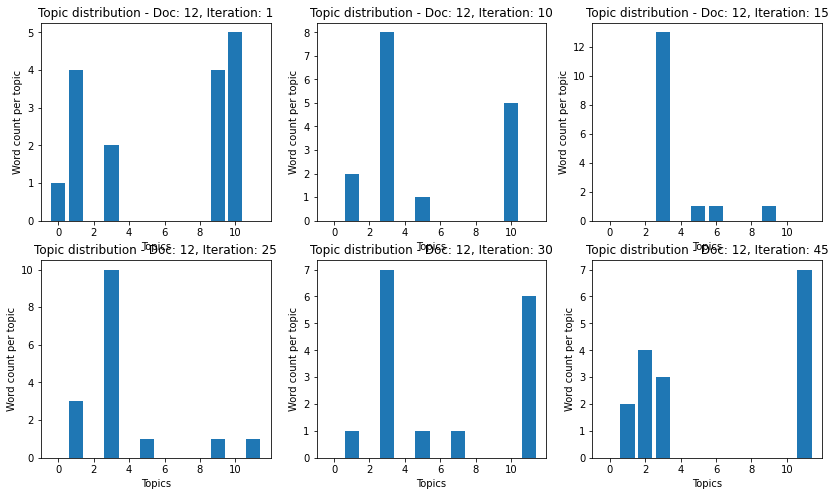

In [57]:
plot_topics_distributions([1, 10, 15, 25, 30, 45], 12, model)

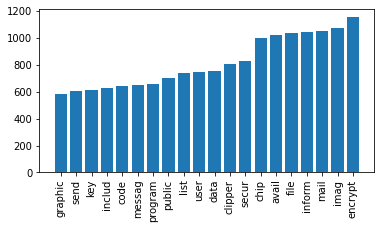

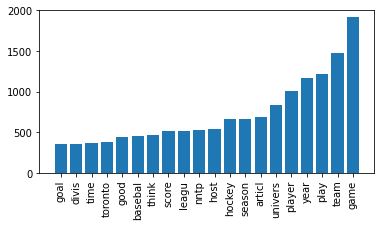

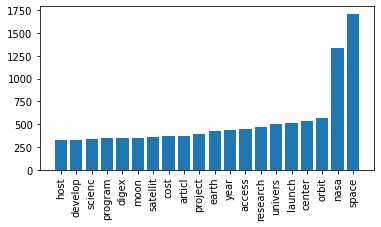

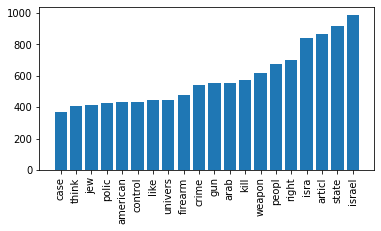

In [58]:
plot_top_words(model.iteration_data, dictionary, topics=[1, 3, 8, 10])

Entropy and perplexity calculation after training the model:

In [59]:
c_d_test = np.zeros((len(test_docs), model.topics_count), dtype=np.int)
z_nd_test = [np.random.randint(0, model.topics_count, size=len(d)) for d in test_docs]
N_test = 0
for d, document in enumerate(test_docs):
    for n, m in enumerate(document):
        k = z_nd_test[d][n]
        c_d_test[d, k] += 1
        N_test += 1  

In [60]:
entropy_test = get_entropy_test_data(model, c_d_test)

Doc 7532/7532


In [61]:
entropy_test

11.387366693445937

In [62]:
perplexity_test = 2 ** entropy_test

In [63]:
perplexity_test

2678.791710542259

### Run 4

- Number of topics: 15
- Iterations: 55
- $\alpha$: 0.3
- $\gamma$: 0.3

In [64]:
topics_num = 15
iterations = 55
alpha = 0.3
gamma = 0.3

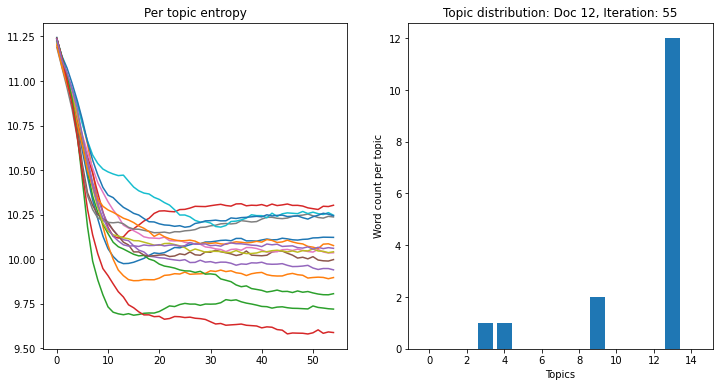

Iteration: 55/55, time: 54.276111364364624 seconds


In [65]:
model = LDAModel(seed=4567)
model.fit(docs, dictionary, topics_num, iterations, alpha, gamma, max_doc_len=maxdoclen)

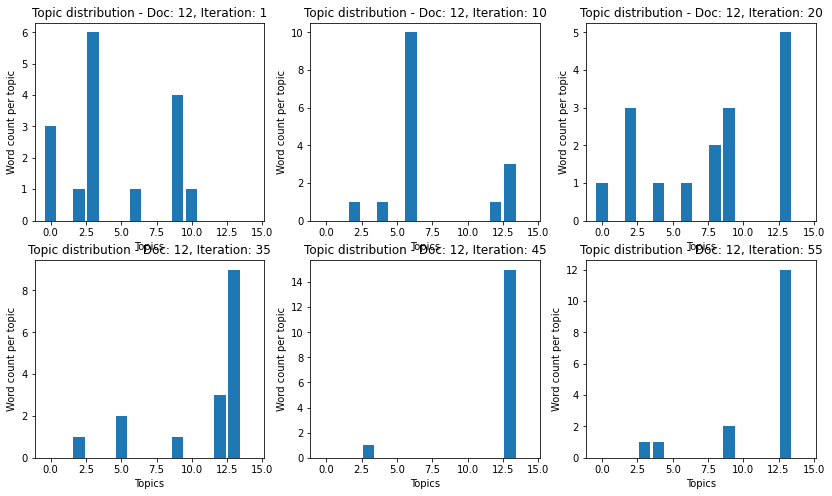

In [66]:
plot_topics_distributions([1, 10, 20, 35, 45, 55], 12, model)

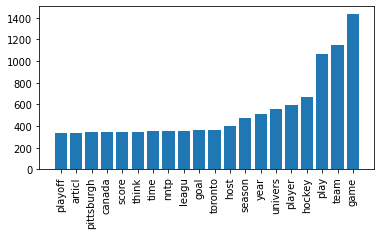

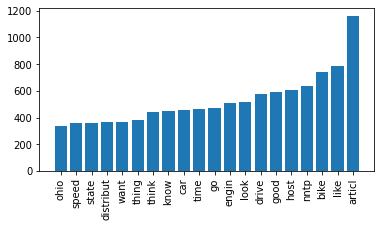

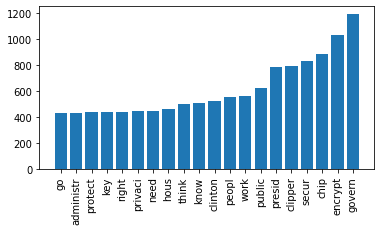

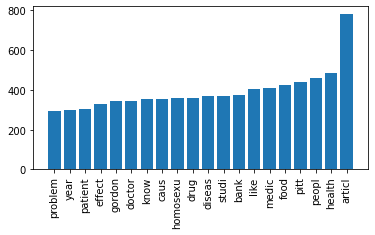

In [67]:
plot_top_words(model.iteration_data, dictionary, topics=[1, 3, 8, 10])

Entropy and perplexity calculation after training the model:

In [68]:
c_d_test = np.zeros((len(test_docs), model.topics_count), dtype=np.int)
z_nd_test = [np.random.randint(0, model.topics_count, size=len(d)) for d in test_docs]
N_test = 0
for d, document in enumerate(test_docs):
    for n, m in enumerate(document):
        k = z_nd_test[d][n]
        c_d_test[d, k] += 1
        N_test += 1

In [69]:
entropy_test = get_entropy_test_data(model, c_d_test)

Doc 7532/7532


In [70]:
entropy_test

11.402600404475939

In [71]:
perplexity_test = 2 ** entropy_test

In [72]:
perplexity_test

2707.227483640092

| Run name | Number of iterations | Number of topics | $\alpha$ | $\gamma$ | Entropy | Perplexity |
|----------|----------------------|------------------|----------|----------|---------|------------|
| Initial  | 50                   | 20               | 0.1      | 0.1      | 11.41   | 2718.886   |
| Run 1    | 40                   | 15               | 0.2      | 0.05     | 11.398  | 2699.49    |
| Run 2    | 35                   | 25               | 0.1      | 0.1      | 11.4147 | 2730.057   |
| Run 3    | 45                   | 12               | 0.3      | 0.3      | 11.387  | 2678.79    |
| Run 4    | 55                   | 15               | 0.3      | 0.3      | 11.4026 | 2707.2275  |